#Análise exploratória, feito entro os anos de 2022 e 2023

Projeto foi feito com intuito de identificar padrões e comportamentos relevantes

In [169]:
#importar as lib necessárias

import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('/car.xlsx - car_data.csv')
df=df.rename(columns={'Date':'Data',
                      'Dealer_Name':'Revendedor',
                      'Customer Name':'Nome_cliente',
                      'Gender':'Genero',
                      'Company':'Marca',
                      'Transmission':'Transmissao',
                      'Color':'Cor',
                      'Price ($)':'preco($)',
                      'Body Style':'Tipo',
                      'Dealer_Region':'Região_Revendedor'})
colunasr=['Car_id','Annual Income','Phone','Dealer_No ','Nome_cliente']
for coluna in colunasr:
  df.drop(coluna,axis=1,inplace=True)
df.head()
#depois de estruturado fiz algumas perguntas e então fui desenrolando o projeto
#-quem compra mais? homem ou mulher?
#-qual marca vende mais?
#-existe uma transmissão que vende mais?
#-e quanto a cor? tem relação com homem ou mulher
#- que tipo de carro vende mais? tem relação com homem ou mulher?
#-qual empresa vende mais?
#-se eu fosse um montador, qual carro ideal seria bom fazer?(cor, modelo, preço)

,Data,Genero,Revendedor,Marca,Model,Engine,Transmissao,Cor,preco($),Tipo,Região_Revendedor
0,1/2/2022,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


Após o tratamento dos dados foi feito uma análise descritiva, onde ja podemos verificar o comportamento do preço

In [171]:
# aqui somente pra verificas as medidas do preço
df.describe().T


,count,mean,std,min,25%,50%,75%,max
preco($),23906.0,28090.247846,14788.687608,1200.0,18001.0,23000.0,34000.0,85800.0


In [ ]:
df.isnull().sum #so para verificar os nulos

Os preços mais notados ficam entre 20k e abaixo de 40k

<Axes: >

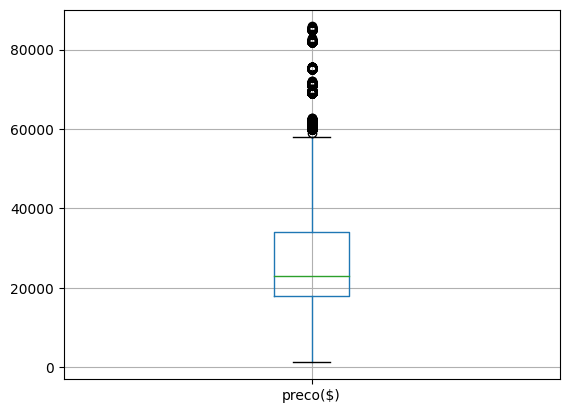

In [76]:
#DETECÇÃO DE OUTLIERS
df.boxplot()

Text(0.5, 1.0, 'Distribuição de preço')

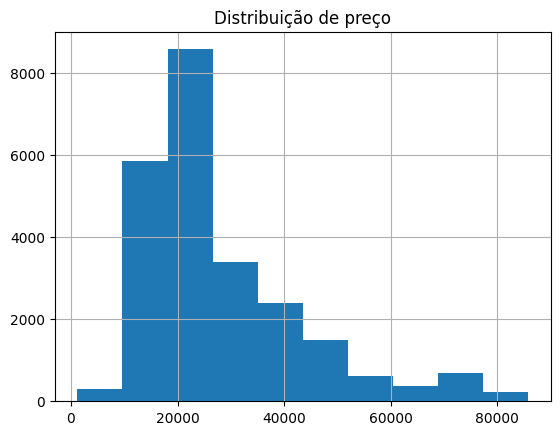

In [72]:
#historograma para verificar o preco
df.hist()
plt.title('Distribuição de preço')

A chevrolet foi a marca que mais vendeu carros, entre 2022 e 2023

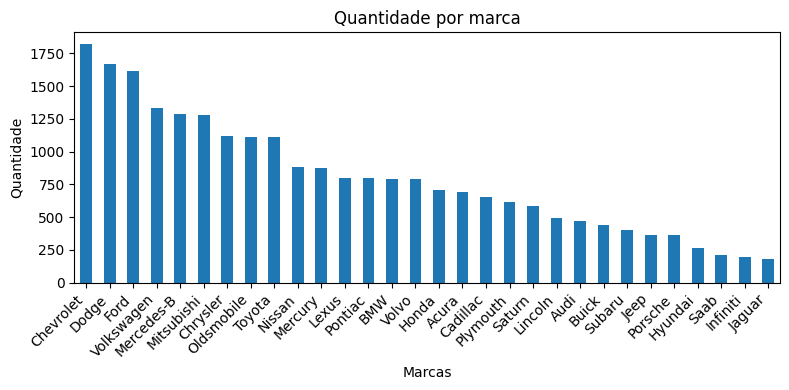

In [53]:
#defini variavl marca, contando as observacoes
marca=df['Marca'].value_counts()
#coloquei em grafico, tive que alterar tamanho de figura
marca.plot(kind='bar',figsize=(8,4))
#aqui adiciona titulos e eixos
plt.title('Quantidade por marca')
plt.xlabel('Marcas')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')#esse metodo para configurar o eixo x(inclinar)
plt.tight_layout()
plt.show()


Tanto homens quanto mulheres preferem a cor branca

Text(0.5, 1.0, 'Cores mais vendidas')

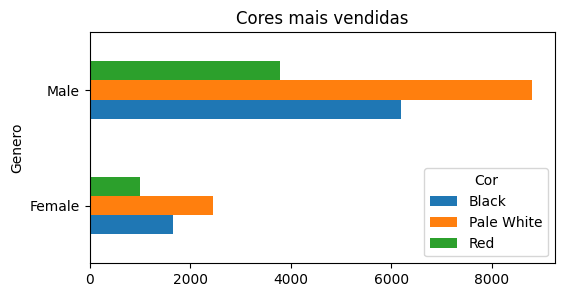

In [117]:
#relacionei cor com genero
corF=pd.crosstab(df['Genero'],df['Cor'])
corF.plot(kind='barh',figsize=(6,3))
plt.title('Cores mais vendidas')

Modelos mais vendidos é o SUV



Text(0, 0.5, '')

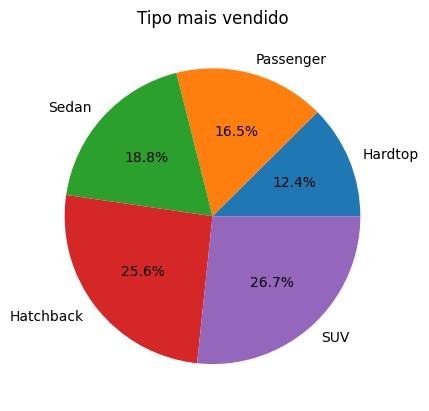

In [163]:
#plotei tipo mais vendido
tipo=df['Tipo'].value_counts(ascending=True)
tipo.plot(kind='pie',autopct='%1.1f%%')
plt.title('Tipo mais vendido')
plt.ylabel('')

Tanto homens quanto mulheres preferem os modelos SUV e Hatch

<Figure size 1000x600 with 0 Axes>

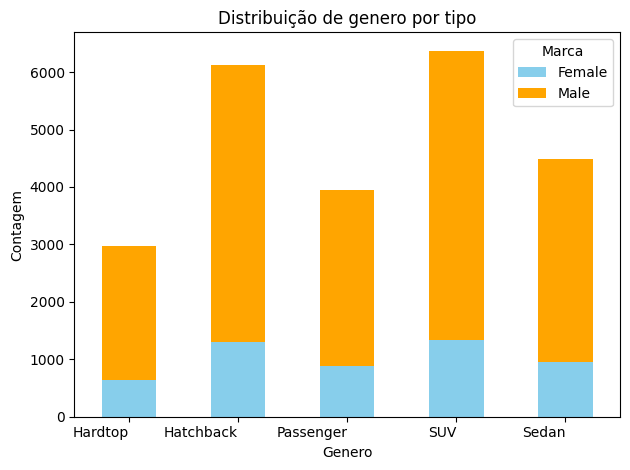

In [99]:
# Criei uma tabela de contagem cruzada
crosstab = pd.crosstab(df['Tipo'], df['Genero'])

# plotei em colunas empilhadas
plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'green', 'red', 'purple'])

#novamente os titulos e eixos
plt.title('Distribuição de genero por tipo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0, ha='right')#deixar eixo x na horizontal
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

Transmissao automatica é mais vendidas, tanto homens como mulheres

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

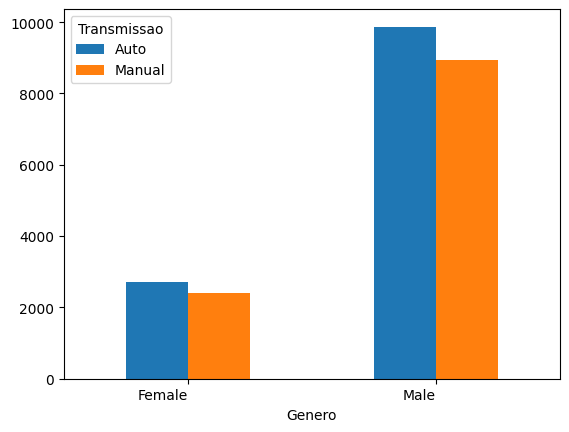

In [98]:
#novamente tabela cruzada
vendar=pd.crosstab(df['Genero'],df['Transmissao'])
vendar.plot(kind='bar')
plt.xticks(rotation=0,ha='right')#deixar eixo x na horizontal

Média do preço dos carros é 28k, com mínima de 12k e máxima de 85k

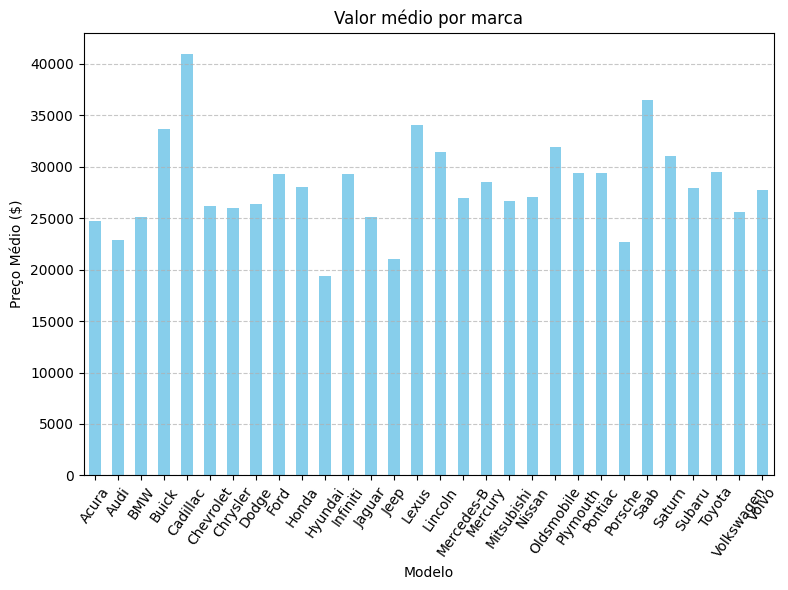

In [172]:
#agrupei o df por marca e preco, sendo que preco utilizei a media, ainda não tinha uma variavel dela entao usei aqui mesmo
grupo_modelo = df.groupby('Marca')['preco($)'].mean()
model=df['Model']
# Plotei gráfico de barras
plt.figure(figsize=(8, 6))
grupo_modelo.plot(kind='bar', color='skyblue')
#titulos e eixos
plt.title('Valor médio por marca')
plt.xlabel('Modelo')
plt.ylabel('Preço Médio ($)')
plt.xticks(rotation=55)#eixo x inclinacao
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

periodos com mais vendas foram em 11 e 12 de 2022, 09,11 e 12 de 2023. Tem uma sasonalidade para vendas de carros em fim de ano, 3 e 4  trimestre

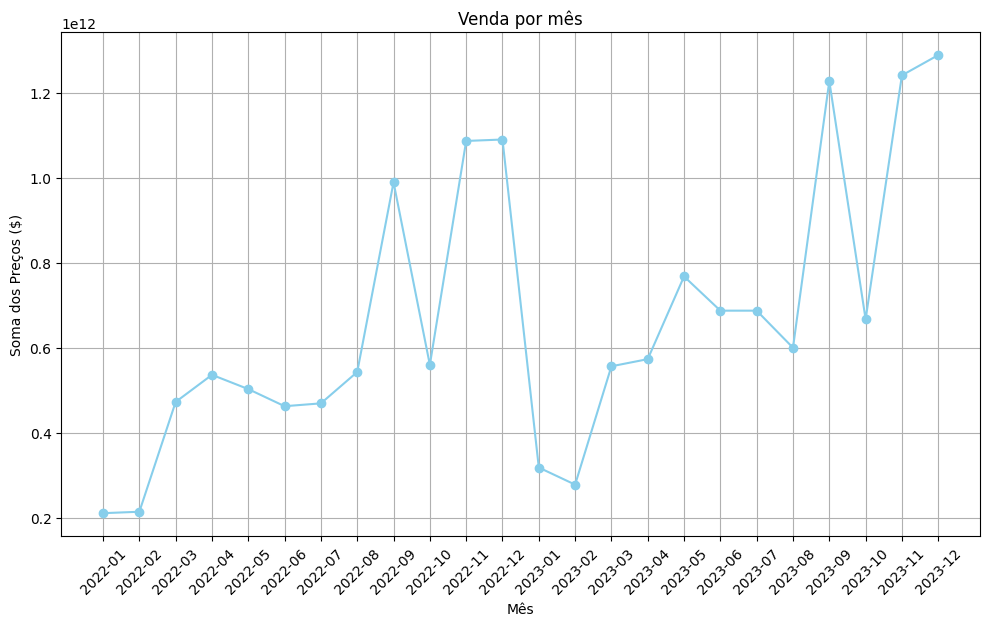

In [161]:
# data do df para tipo data
df['Data'] = pd.to_datetime(df['Data'])

# extrai o mes do df
df['Mes'] = df['Data'].dt.to_period('M')

# somei os precos
soma_precos_por_mes = df.groupby('Mes')['preco($)'].sum()

# plotei em linha
plt.figure(figsize=(10, 6))
plt.plot(soma_precos_por_mes.index.astype(str), soma_precos_por_mes.values, marker='o', color='skyblue', linestyle='-')

# titulos e eixos..
plt.title('Venda por mês')
plt.xlabel('Mês')
plt.ylabel('Soma dos Preços ($)')
plt.grid(True)  # Adicionar grade
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Com base nessas obervações, seria interesante para as outras empresas que queiram entrar no mercado, produzir um carro SUV e/ou hatch, de transmissão automática, na cor branca, com valores entre 25-35k, com lançamente no 4 trimestre do ano**